In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

# preprocessing of camera dataset 

In [37]:
df= pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/camera_dataset.csv')

In [3]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [4]:
df.size


13494

In [5]:
df.sample(5)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
839,Samsung Digimax A502,2005,2592.0,2272.0,5.0,31.0,31.0,100.0,2.0,16.0,175.0,97.0,229.0
413,Kodak DX6440,2003,2304.0,0.0,4.0,33.0,132.0,50.0,10.0,16.0,270.0,109.0,129.0
418,Kodak Easyshare One,2005,2304.0,0.0,4.0,36.0,100.0,60.0,10.0,256.0,275.0,103.0,296.0
43,Canon PowerShot A75,2004,2048.0,1600.0,3.0,35.0,105.0,46.0,5.0,32.0,315.0,101.0,139.0
155,Casio Exilim EX-Z77,2007,3072.0,2560.0,7.0,38.0,114.0,40.0,10.0,11.0,128.0,95.0,199.0


In [6]:
type(df.Price.values)

numpy.ndarray

In [7]:
type(df.Dimensions.values)

numpy.ndarray

In [8]:
df = df.rename(columns={"Weight (inc. batteries)": "Weight"})
df.head(5)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [9]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [10]:
df.Price.isnull().sum()

0

In [11]:
print('Mean : ', df.Price.mean())
print('Std. dev : ', df.Price.std())
print('Min : ', df.Price.min())
print('Max : ', df.Price.max())
print('Median : ', df.Price.median())
print('Length : ', len(df.Price))

Mean :  457.38439306358384
Std. dev :  760.4529176412254
Min :  14.0
Max :  7999.0
Median :  199.0
Length :  1038


In [12]:
 co=df.corr().round(2)

<AxesSubplot:>

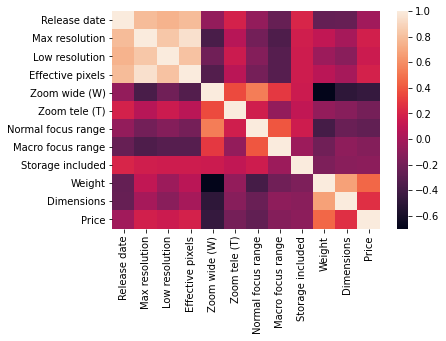

In [13]:
sns.heatmap(co, xticklabels=co.columns, yticklabels=co.columns)

<AxesSubplot:>

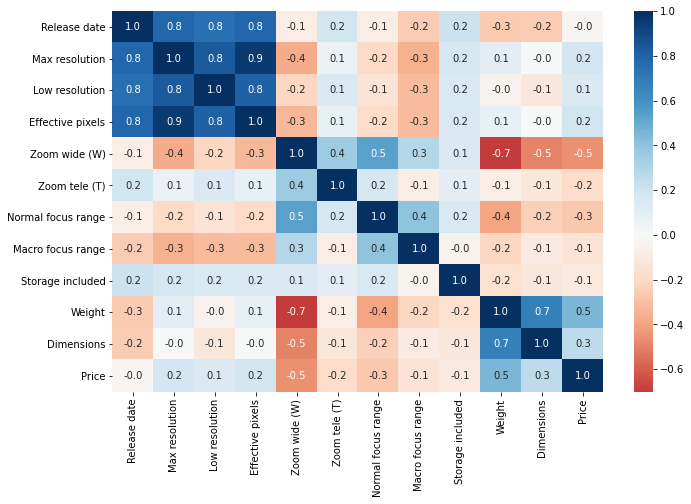

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(co, annot=True, fmt='.1f', cmap='RdBu', center=0, ax=ax)

In [15]:
df.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included', 'Weight',
       'Dimensions', 'Price'],
      dtype='object')

In [16]:
missingRows = df.sample(10).index
missingRows

Int64Index([635, 196, 759, 347, 658, 104, 596, 601, 139, 422], dtype='int64')

In [17]:
df.loc[missingRows, "Effective pixels"] = np.nan

In [18]:
df.mean()

Release date          2003.590559
Max resolution        2474.672447
Low resolution        1773.936416
Effective pixels         4.602140
Zoom wide (W)           32.963391
Zoom tele (T)          121.525048
Normal focus range      44.145472
Macro focus range        7.787850
Storage included        17.447876
Weight                 319.265444
Dimensions             105.363417
Price                  457.384393
dtype: float64

In [19]:
df.std()

Release date            2.724755
Max resolution        759.513608
Low resolution        830.897955
Effective pixels        2.847003
Zoom wide (W)          10.333149
Zoom tele (T)          93.455422
Normal focus range     24.141959
Macro focus range       8.100081
Storage included       27.440655
Weight                260.410137
Dimensions             24.262761
Price                 760.452918
dtype: float64

In [20]:
pp=df.iloc[:,0:13]

In [21]:
pp.head(2)


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0


In [22]:
camera = (pp - pp.mean())/ pp.std()

In [23]:
camera.head()

,Dimensions,Effective pixels,Low resolution,Macro focus range,Max resolution,Model,Normal focus range,Price,Release date,Storage included,Weight,Zoom tele (T),Zoom wide (W)
0,-0.427133,-1.616486,-1.364712,3.976769,-1.910002,NaN,1.070937,-0.366077,-2.418771,-0.490071,0.386830,-0.080520,0.487422
1,2.169439,-1.265239,-1.364712,-0.961453,-1.572944,NaN,0.242504,-0.366077,-2.051766,-0.490071,0.386830,-0.080520,0.487422
2,-4.342598,-1.616486,-2.134963,-0.961453,-2.415589,NaN,-1.828579,-0.366077,-1.317755,-0.562956,-1.226010,-0.818840,1.164854
3,-4.342598,-1.616486,-1.364712,-0.961453,-1.741473,NaN,-1.828579,-0.247727,-1.684760,-0.490071,-1.226010,-0.925843,0.197095
4,0.932976,-1.616486,-1.364712,-0.961453,-1.741473,NaN,0.242504,1.106729,-1.684760,0.821851,-0.073981,-0.840241,0.971302


In [24]:
df.drop(["Model"], axis = 1, inplace = True)

In [25]:
df


,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [26]:
#group by in preprocessing with respect to price range.
df.groupby('Price').count()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions
Price,,,,,,,,,,,
14.0,2,2,2,1,2,2,2,2,2,2,2
19.0,2,2,2,2,2,2,2,2,2,2,2
62.0,10,10,10,10,10,10,10,10,10,10,10
99.0,32,32,32,32,32,32,32,32,32,32,32
119.0,4,4,4,4,4,4,4,4,4,4,4
126.0,41,41,41,40,41,41,41,41,41,41,41
129.0,92,92,92,92,92,92,92,92,92,92,92
139.0,34,34,34,34,34,34,34,34,34,34,34
146.0,8,8,8,8,8,8,8,8,8,8,8


Text(0.5, 0, 'Square Root Units')

<Figure size 720x540 with 0 Axes>

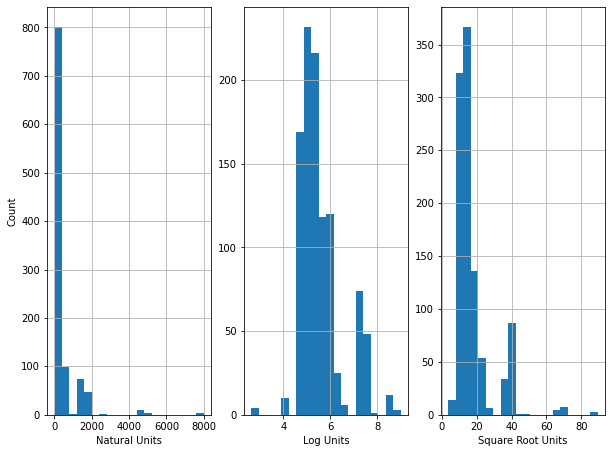

In [27]:
 #skewness transformation of the price tag.
 %matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(df['Price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(np.log(df['Price'].values), bins=20)
ax2.set_xlabel('Log Units')

ax3.hist(np.sqrt(df['Price'].values), bins=20)
ax3.set_xlabel('Square Root Units')

In [28]:
from scipy.stats import skew
r = np.max(df['Price'].values)/np.min(df['Price'].values)
skewness = skew(df['Price'].values)
skewness

5.17945844837875

In [29]:
from scipy.stats import boxcox
boxcox(df['Price'].values)[1]

-0.36444783091384036

-0.36444783091384036

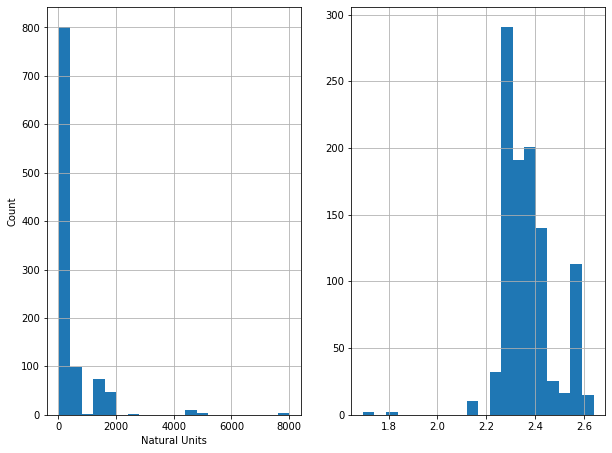

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(df['Price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(boxcox(df['Price'].values)[0], bins=20)
boxcox(df['Price'].values)[1]

In [ ]:
 null hypothesis:mean of the sample and price of camera in dataset are same 
alternate hypothesis:mean of sample is not same to price of camera in dataset 

## t test

In [38]:
Z=df[["Price"]]

In [39]:
data = Z

In [40]:
data


,Price
0,179.0
1,179.0
2,179.0
3,269.0
4,1299.0
...,...
1033,62.0
1034,62.0
1035,62.0
1036,62.0


In [41]:
import numpy as np
data_mean=np.mean(data)
print(data_mean)

Price    457.384393
dtype: float64


In [42]:
len(data)

1038

In [43]:
sample_size=30
data_sample=np.random.choice(data['Price'],sample_size)
data_sample

array([ 179.,  299.,  126.,  329.,  149., 1399.,  229.,   62.,  199.,
        149.,  139.,  229., 1399.,  139., 1699., 1499., 1699.,  139.,
        169.,  799.,  149.,  449., 1699.,  179.,  249.,  229.,  229.,
        229.,  126.,  384.])

In [44]:
from scipy.stats import ttest_1samp

In [45]:
ttest,p_value=ttest_1samp(data_sample, 457.384393)

In [46]:
print(p_value)

0.6924603957574652


In [47]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


we accept the null hypothesis

# regression

In [43]:
df2=pd.read_csv("https://raw.githubusercontent.com/Gopikrishnan96/master/main/camera_dataset.csv")

In [44]:
df2


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [45]:
df.isna().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [46]:
df.fillna(0.0, inplace=True)

In [47]:
df.isna().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

In [48]:
df.drop(["Model"], axis = 1, inplace = True)

In [49]:
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [50]:
df.shape
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [51]:
X=df

In [52]:
y=df[['Price']]

In [53]:
y

,Price
0,179.0
1,179.0
2,179.0
3,269.0
4,1299.0
...,...
1033,62.0
1034,62.0
1035,62.0
1036,62.0


In [54]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [55]:
linreg.fit(X,y)

LinearRegression()

In [56]:
np.round(linreg.coef_.ravel(), 4)

array([ 0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  1.])

In [57]:
linreg.intercept_

array([-2.43971954e-10])

In [58]:
y_pred = linreg.predict(X)
y_pred[:5]

array([[ 179.],
       [ 179.],
       [ 179.],
       [ 269.],
       [1299.]])

In [59]:
y[:5]

,Price
0,179.0
1,179.0
2,179.0
3,269.0
4,1299.0


Text(0.5, 0, ' Price')

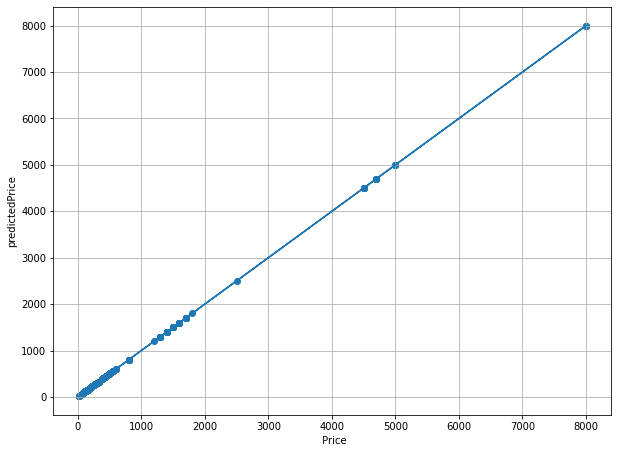

In [62]:
plt.scatter(y,y_pred)
plt.ylabel('Predicted Price')
plt.xlabel('Price')

plt.plot(y,y_pred)
plt.ylabel('predictedPrice')
plt.xlabel(' Price')

In [63]:

x_all = sm.add_constant(X)
x_all.head()

,const,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1.0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1.0,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,1.0,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1.0,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1.0,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [64]:
est_all = sm.OLS(y, x_all)

In [65]:
est_a = est_all.fit()

In [66]:
est_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.974e+28
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:05:24   Log-Likelihood:                 23360.
No. Observations:                1038   AIC:                        -4.669e+04
Df Residuals:                    1025   BIC:                        -4.663e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.132e-10   1.97e-09      0.210      0.834   -3.46e-09    4.28e-09
Release date            -1.866e-13   9.86e-13     -0.189      0.850   -2.12e-12    1.75e-12
Max resolution           9.839e-16   6.46e-15      0.152      0.879   -1.17e-14    1.37e-14
Low resolution          -3.171e-16   3.01e-15     -0.105      0.916   -6.22e-15    5.58e-15
Effective pixels         1.217e-13   1.55e-12      0.079      0.937   -2.92e-12    3.16e-12
Zoom wide (W)           -3.059e-14   2.42e-13     -0.126      0.899   -5.06e-13    4.44e-13
Zoom tele (T)            1.993e-15   1.72e-14      0.116      0.908   -3.18e-14    3.58e-14
Normal focus range      -5.274e-16   6.67e-14     -0.008      0.994   -1.31e-13     1.3e-13
Macro focus range        9.652e-15   1.83e-13      0.053      0.958   -3.49e-13    3.68e-13
Storage included         8.908e-16   4.88e-14      0.018      0.985    -9.5e-14    9.67e-14
Weight (inc. batteries) -1.863e-15   1.01e-14     -0.184      0.854   -2.18e-14    1.81e-14
Dimensions               3.483e-15   7.12e-14      0.049      0.961   -1.36e-13    1.43e-13
Price                       1.0000   2.01e-15   4.99e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       57.475   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.006
Skew:                           0.160   Prob(JB):                     2.47e-41
Kurtosis:                       5.055   Cond. No.                     5.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# classification 

In [4]:
crdf=pd.read_csv("https://raw.githubusercontent.com/Gopikrishnan96/master/main/cereal.csv")

In [5]:
crdf.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [6]:
crdf.shape

(77, 16)

In [7]:
crdf.describe

<bound method NDFrame.describe of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1

In [9]:
crdf.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [10]:
crdf = crdf.replace(-1, np.nan)

In [11]:
crdf.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [12]:
for column in ['carbo', 'sugars', 'potass']:
    crdf[column] = crdf[column].fillna(crdf[column].mean())

In [13]:
crdf.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [14]:
crdf.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [15]:
crdf['type'].unique()

array(['C', 'H'], dtype=object)

In [16]:
crdf.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [17]:
columns_to_drop=[ 'name','mfr']

In [18]:
data_clean=crdf.drop(columns=columns_to_drop)

In [19]:
data_clean

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
73,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
74,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
75,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
data_clean['type']

0     C
1     C
2     C
3     C
4     C
     ..
72    C
73    C
74    C
75    C
76    C
Name: type, Length: 77, dtype: object

In [23]:

le.fit_transform(data_clean['type'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
data_clean['type']=le.fit_transform(data_clean['type'])

In [25]:
data_clean

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
73,0,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
74,0,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
75,0,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [26]:
input_cols=['fat', 'calories', 'protein', 'sodium', 'fiber', 'carbo','sugars','potass','vitamins','shelf','weight','cups','rating']


In [27]:
output_cols=['type']

In [28]:
X=data_clean[input_cols]


In [29]:
y=data_clean[output_cols]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [128]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
y_pred = classifier.predict(X_test)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.00      0.00      0.00         1

    accuracy                           0.96        24
   macro avg       0.48      0.50      0.49        24
weighted avg       0.92      0.96      0.94        24



c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

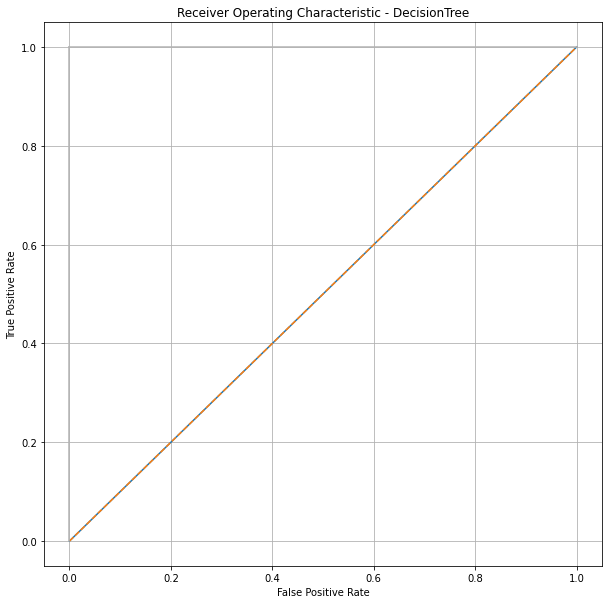

In [132]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### average classifier

# pca

In [137]:
crdf.drop(columns = {"name","mfr"},inplace = True)

In [138]:
crdf

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.000000,25,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.000000,0,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.000000,25,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.000000,25,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8.0,98.666667,25,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3.0,60.000000,25,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12.0,25.000000,25,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3.0,115.000000,25,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3.0,110.000000,25,1.0,1.00,51.592193


In [142]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
crdf_normalised= preprocessing.scale(crdf)
crdf_normalised

array([[-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
        -3.56305633e-01,  3.31443928e+00, -2.54201327e+00,
        -2.37495223e-01,  2.62705328e+00, -1.46270130e-01,
        -1.98067464e-01, -2.12387042e+00,  1.84420206e+00],
       [ 6.77623471e-01,  4.17912310e-01,  3.98734926e+00,
        -1.73708742e+00, -6.41716689e-02, -1.76405485e+00,
         2.25315980e-01,  5.26376484e-01, -1.27255013e+00,
        -1.98067464e-01,  7.74052748e-01, -6.22109937e-01],
       [-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
         1.20457813e+00,  2.89211291e+00, -2.02337432e+00,
        -4.68900824e-01,  3.20655033e+00, -1.46270130e-01,
        -1.98067464e-01, -2.12387042e+00,  1.20092224e+00],
       [-2.93860476e+00,  1.33731939e+00, -1.01307245e+00,
        -2.36237652e-01,  5.00374475e+00, -1.76405485e+00,
        -1.62592883e+00,  3.35142459e+00, -1.46270130e-01,
        -1.98067464e-01, -1.38857648e+00,  3.65721064e+00],
       [ 1.61019439e-01, -5.01494772e-01,  9.8709623

In [143]:
pca= PCA()
pca.fit(crdf_normalised)

PCA()

In [144]:
pca_sum_df = pd.DataFrame({"SD" : np.sqrt(pca.explained_variance_),
                          "POVariance" : pca.explained_variance_ratio_,
                          "CP":np.cumsum(pca.explained_variance_ratio_)})

In [145]:
pca_sum_df = pca_sum_df.transpose()

In [146]:
pca_sum_df

,0,1,2,3,4,5,6,7,8,9,10,11
SD,1.89934,1.734684,1.375034,1.032294,0.865500,0.833396,0.765040,0.602332,0.306529,0.261583,0.164006,0.062532
POVariance,0.29672,0.247504,0.155514,0.087649,0.061614,0.057127,0.048140,0.029841,0.007728,0.005628,0.002212,0.000322
CP,0.29672,0.544224,0.699738,0.787387,0.849001,0.906128,0.954269,0.984110,0.991838,0.997466,0.999678,1.000000


In [148]:
pca_sum_df.columns = ["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"]

In [150]:
pca_Comp_df = pd.DataFrame(pca.components_.transpose(),
                                columns=pca_sum_df.columns,
                                index=crdf.columns)

In [151]:
pca_Comp_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
calories,-0.375462,-0.313964,0.134783,0.311021,-0.213512,0.017862,0.027503,-0.013438,0.515786,0.221153,-0.520150,-0.114934
protein,0.277821,-0.235854,0.265266,0.429216,0.194894,0.173086,-0.116436,0.704877,-0.011796,-0.036747,0.109645,0.143988
fat,-0.110912,-0.333445,-0.209260,0.532690,0.473955,-0.066457,0.131760,-0.414129,-0.174886,0.083908,0.263092,-0.155588
sodium,-0.217523,-0.099629,0.378946,-0.308748,0.416755,-0.596727,-0.307691,0.130145,0.004583,0.066291,0.005486,-0.240850
fiber,0.404010,-0.305857,0.083596,-0.225555,0.018401,0.018219,-0.178176,-0.273468,0.269869,0.551505,0.182005,0.409937
carbo,-0.143090,0.224018,0.561267,0.257421,-0.297881,-0.144180,0.136785,-0.207139,0.232149,-0.168593,0.530479,0.114858
sugars,-0.298008,-0.315885,-0.342533,-0.234084,-0.212552,0.189419,-0.170986,0.246797,0.241767,-0.006521,0.560582,-0.308764
potass,0.330689,-0.406042,0.090180,-0.093792,-0.005517,0.050018,-0.214106,-0.286906,0.187330,-0.720964,-0.129052,-0.081369
vitamins,-0.171724,-0.112122,0.381106,-0.371545,0.372878,0.542978,0.485380,-0.030547,0.026419,-0.002907,-0.001603,-0.059612
weight,-0.140965,-0.441709,0.280944,-0.045372,-0.450554,0.036535,-0.067398,-0.066244,-0.691232,0.105111,-0.043501,0.005179


# tableau 

https://public.tableau.com/profile/gopikrishnan.c.p#!/vizhome/Book1_16175509700650/Story2?publish=yes

In [1]:
#k-fold cross validation and logistic regression
from sklearn.model_selection import cross_val_score

## k fold cross validation and logistic regression.

In [32]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [33]:
from sklearn import metrics
logreg_pred = logreg.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, logreg_pred))

0.9583333333333334


In [34]:
confusion_matrix(logreg_pred, y_test)

array([[23,  1],
       [ 0,  0]], dtype=int64)

In [35]:
print(classification_report(logreg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         0

    accuracy                           0.96        24
   macro avg       0.50      0.48      0.49        24
weighted avg       1.00      0.96      0.98        24



c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
cv_scores = cross_val_score(logreg,X_train,y_train, cv=10)

print(cv_scores)

[1.         0.83333333 0.83333333 1.         1.         1.
 1.         1.         1.         1.        ]


c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vecto